In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import wordnet


In [2]:
nltk.download("averaged_perceptron_tagger","punkt","wordnet")
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\UGLY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv --no-check-certificate

File 'bbc_text_cls.csv' already there; not retrieving.



In [4]:
df = pd.read_csv("bbc_text_cls.csv")
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
inputs = df["text"]
labels = df["labels"]

<AxesSubplot:>

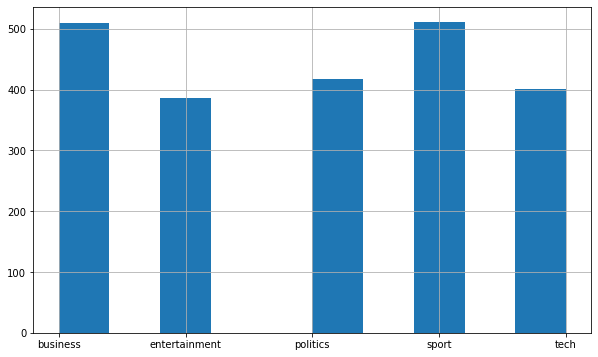

In [7]:
labels.hist(figsize=(10,6))

In [8]:
inputs_train,inputs_test,y_train,y_test = train_test_split(inputs,labels,random_state=123)

In [9]:
vectorizer = CountVectorizer()

In [11]:
x_train = vectorizer.fit_transform(inputs_train)
x_test = vectorizer.transform(inputs_test)

In [18]:
x_train


<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [17]:
(x_train != 0).sum()

337411

In [19]:
1668*26287

43846716

In [23]:
337411/43846716

0.007695239935415004

In [22]:
# What percentage of values are non zero?
(x_train !=0).sum() / np.prod(x_train.shape)

0.007695239935415004

In [26]:
model = MultinomialNB()
model.fit(x_train,y_train)
print("train score:", model.score(x_train,y_train))
print("test score:", model.score(x_test,y_test))

train score: 0.9922062350119905
test score: 0.9712746858168761


#####  test with stopwords

In [71]:
vectorizer = CountVectorizer(stop_words = "english")

In [72]:
x_train = vectorizer.fit_transform(inputs_train)
x_test = vectorizer.transform(inputs_test)

In [73]:
model.fit(x_train,y_train)
print("train score:", model.score(x_train,y_train))
print("test score:", model.score(x_test,y_test))

train score: 0.9928057553956835
test score: 0.9766606822262118


In [74]:
x_train

<1668x25995 sparse matrix of type '<class 'numpy.int64'>'
	with 242123 stored elements in Compressed Sparse Row format>

### Lemmatization

In [38]:
def pos_wordnet(treebank_tag):
    if treebank_tag.startswith ("V"):
        return wordnet.VERB
    elif treebank_tag.startswith ("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith ("R"):
        return wordnet.ADV
    elif treebank_tag.startswith ("J"):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

In [39]:
class LemmaTokenizer: #this class will tokenize and then lemmatize our sentence using for loop
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word , pos = pos_wordnet(tag))\
               for word,tag in words_and_tags]
        

In [41]:
# with lemmatization

vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, y_train)
print("train score:", model.score(Xtrain, y_train))
print("test score:", model.score(Xtest, y_test))

train score: 0.9922062350119905
test score: 0.9676840215439856


In [43]:
# with lemmatization
vectorizer = CountVectorizer(tokenizer = LemmaTokenizer())
x_train = vectorizer.fit_transform(inputs_train)
x_test = vectorizer.transform(inputs_test)
model.fit(x_train,y_train)
print("model_score:", model.score(x_train,y_train))
print("model_score:", model.score(x_test,y_test))

model_score: 0.9922062350119905
model_score: 0.9676840215439856


### Stemming & Tokenizing

In [68]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self,doc):
        token = word_tokenize(doc)
        return [self.porter.stem(t) for t in token]
    

In [69]:
# stemming
vectorizer = CountVectorizer(tokenizer = StemTokenizer())
x_train = vectorizer.fit_transform(inputs_train)
x_test = vectorizer.transform(inputs_test)
model.fit(x_train,y_train)
print("test score:", model.score(x_test,y_test))

test score: 0.9694793536804309


In [70]:
x_train

<1668x22828 sparse matrix of type '<class 'numpy.int64'>'
	with 335081 stored elements in Compressed Sparse Row format>

### String Split Tokenizer

In [63]:
def simple_tokenizer(s):
    return s.split()

In [65]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer = simple_tokenizer)
x_train = vectorizer.fit_transform(inputs_train)
x_test = vectorizer.transform(inputs_test)
model.fit(x_train,y_train)
print("train-score:", model.score(x_train,y_train))
print("test_score:", model.score(x_test,y_test))
      

train-score: 0.9952038369304557
test_score: 0.9712746858168761


In [67]:
x_train

<1668x52144 sparse matrix of type '<class 'numpy.int64'>'
	with 369097 stored elements in Compressed Sparse Row format>